In [2]:
import pandas as pd
import numpy as np
from src.data_paths import *

In [3]:
df_doi = pd.read_pickle(DOI_DF_PATH)
print("DOI DataFrame len: ", len(df_doi))
df_doi.head()

DOI DataFrame len:  40737


,fetched,title,abstract,year,month,day
doi,,,,,,
10.1021/jm9602571,True,"Cyclic HIV Protease Inhibitors: Synthesis, Co...",No abstract available,1996,1,1
10.1016/j.chembiol.2013.07.014,True,Substrate Envelope-Designed Potent HIV-1 Prote...,No abstract available,2013,9,<NA>
10.1021/jm9507183,True,"A Novel, Picomolar Inhibitor of Human Immunode...",No abstract available,1996,1,1
10.1126/science.2200122,True,"Design, Activity, and 2.8 Å Crystal Structure ...",<jats:p>\n A two-fold (\n ...,1990,8,3
10.1021/ja00082a004,True,Influence of stereochemistry on activity and b...,No abstract available,1994,2,<NA>


In [4]:
df_bindingdb = pd.read_pickle(BINDINGDB_CLEAN)
df_bindingdb.head()

,ki,ph,temp,ic50,ec50,kd,kon,koff,doi,target_name,...,chembl_id,drugbank_id,kegg_id,zinc_id,smiles,inchi_key,bindingdb_id,swissprot_target_chain_name,swissprot_target_chain_entry_name,swissprot_protein_id
0,0.24,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,<NA>,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,Gag-Pol polyprotein,POL_HV1BR,<NA>
1,0.25,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03948988,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,Gag-Pol polyprotein,POL_HV1BR,<NA>
2,0.41,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03826079,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,Gag-Pol polyprotein,POL_HV1BR,<NA>
3,0.8,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907367,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,Gag-Pol polyprotein,POL_HV1BR,<NA>
4,0.99,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907369,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,Gag-Pol polyprotein,POL_HV1BR,<NA>


**We will rely on other columns (like Target Name) and further metadata to get the cancers and mutants more accurately**

In [26]:
df_bindingdb['target_name'].nunique()

6734

In [ ]:
filtered_df = df_bindingdb

filtered_df.head()

,ki,ph,temp,ic50,ec50,kd,kon,koff,doi,target_name,...,chembl_id,drugbank_id,kegg_id,zinc_id,smiles,inchi_key,bindingdb_id,swissprot_target_chain_name,swissprot_target_chain_entry_name,swissprot_protein_id
0,0.24,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,<NA>,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,Gag-Pol polyprotein,POL_HV1BR,<NA>
1,0.25,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03948988,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,Gag-Pol polyprotein,POL_HV1BR,<NA>
2,0.41,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC03826079,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,Gag-Pol polyprotein,POL_HV1BR,<NA>
3,0.8,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907367,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,Gag-Pol polyprotein,POL_HV1BR,<NA>
4,0.99,5.5,37.0,<NA>,<NA>,<NA>,<NA>,<NA>,10.1021/jm9602571,Dimer of Gag-Pol polyprotein [501-599],...,<NA>,<NA>,<NA>,ZINC14907369,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,Gag-Pol polyprotein,POL_HV1BR,<NA>


In [6]:
len(filtered_df), len(df_bindingdb)

(2923143, 2923143)

In [ ]:
cancer_ralated_proteins = filtered_df['target_name'].unique()

len(cancer_ralated_proteins)

6734

How many articles per cancer-related protein?

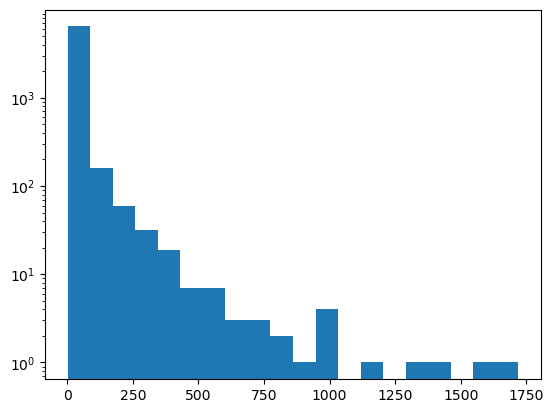

In [ ]:

import matplotlib.pyplot as plt
from math import log

protein_to_doi = {prot: set() for prot in cancer_ralated_proteins}
for _, row in filtered_df.iterrows():
    protein = row['target_name']
    doi = row['doi']
    protein_to_doi[protein].add(doi)

count = {prot: len(dois) for prot, dois in protein_to_doi.items()}
# Make the histogram (log y)
hist = plt.hist(count.values(), bins=20)
plt.yscale('log')






So we that at some of the cancer-related protiens were studied hundreds of times!

xmin (start of power-law fit): 301.0
alpha (power-law exponent): 2.9205947066567424


Calculating best minimal value for power law fit
/home/miki/epfl/ada_project/.conda/lib/python3.12/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


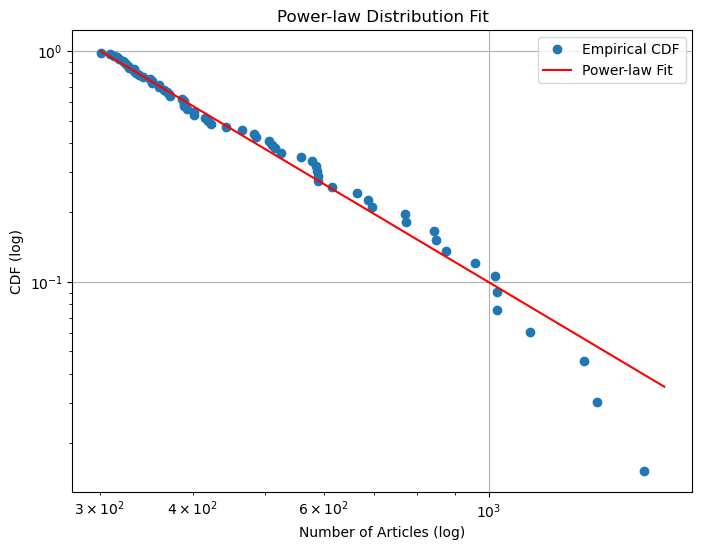

In [9]:
data = [i for i in sorted(count.values(), reverse=True) if i>300]
import powerlaw


# Fit the data to a power-law distribution
fit = powerlaw.Fit(data)

# Extract the x_min and alpha (power-law parameters)
xmin = fit.xmin
alpha = fit.alpha
print(f"xmin (start of power-law fit): {xmin}")
print(f"alpha (power-law exponent): {alpha}")

# Generate CDF for visualization
sorted_data = np.sort(data)
cdf = 1.0 - np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the empirical CDF
plt.figure(figsize=(8, 6))
plt.loglog(sorted_data, cdf, marker='o', linestyle='none', label='Empirical CDF')

# Plot the theoretical power-law fit
powerlaw_line = (sorted_data[sorted_data >= xmin] / xmin) ** (1 - alpha)
plt.loglog(sorted_data[sorted_data >= xmin], powerlaw_line, linestyle='-', color='red', label='Power-law Fit')

# Add labels and legend
plt.xlabel('Number of Articles (log)')
plt.ylabel('CDF (log)')
plt.title('Power-law Distribution Fit')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
MIN_ARTICLES = 500
well_studied_proteins = {prot: protein_to_doi[prot] for prot, count in count.items() if count >= MIN_ARTICLES}

cancer_related_proteins = {
    "Cytochrome P450 3A4": False,
    "Epidermal growth factor receptor": True,
    "Proto-oncogene tyrosine-protein kinase Src": True,
    "Vascular endothelial growth factor receptor 2": True,
    "D(2) dopamine receptor": False,
    "5-hydroxytryptamine receptor 1A": False,
    "5-hydroxytryptamine receptor 2A": False,
    "Acetylcholinesterase": False,
    "Cholinesterase": False,
    "Carbonic anhydrase 1": False,
    "Carbonic anhydrase 2": False,
    "Sodium-dependent serotonin transporter": False,
    "Prothrombin": False,
    "Adenosine receptor A2a": False,
    "Histone deacetylase 1": True,
    "Delta-type opioid receptor": False,
    "Mu-type opioid receptor": False,
    "Kappa-type opioid receptor": False,
    "Cytochrome P450 2C9": False,
    "Adenosine receptor A1": False,
    "Potassium voltage-gated channel subfamily H member 2": False,
    "Cannabinoid receptor 1": False,
    "Cytochrome P450 1A2": False,
    "Cytochrome P450 2C19": False,
    "Cytochrome P450 2D6": False,
    "Sodium-dependent dopamine transporter": False,
    "Prostaglandin G/H synthase 1": False,
    "Prostaglandin G/H synthase 2": True
}

cancer_well_studied_proteins = {key: value for key, value in well_studied_proteins.items() if cancer_related_proteins[key]}
well_studied_proteins = cancer_well_studied_proteins

print(f"Number of well-studied proteins: {len(well_studied_proteins)}")
print("Well-studied proteins:")
for k in well_studied_proteins.keys():
    print(f"\t{k}")

print(well_studied_proteins.keys())


Number of well-studied proteins: 5
Well-studied proteins:
	Epidermal growth factor receptor
	Proto-oncogene tyrosine-protein kinase Src
	Vascular endothelial growth factor receptor 2
	Histone deacetylase 1
	Prostaglandin G/H synthase 2
dict_keys(['Epidermal growth factor receptor', 'Proto-oncogene tyrosine-protein kinase Src', 'Vascular endothelial growth factor receptor 2', 'Histone deacetylase 1', 'Prostaglandin G/H synthase 2'])


We see those are indeed distinct (not, for example, mutants of one another). How do the timelines look like?

Epidermal growth factor receptor NA months: 0.30%
Proto-oncogene tyrosine-protein kinase Src NA months: 0.00%
Vascular endothelial growth factor receptor 2 NA months: 0.00%
Histone deacetylase 1 NA months: 0.00%
Prostaglandin G/H synthase 2 NA months: 0.00%


/tmp/ipykernel_281661/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3233094881.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_2

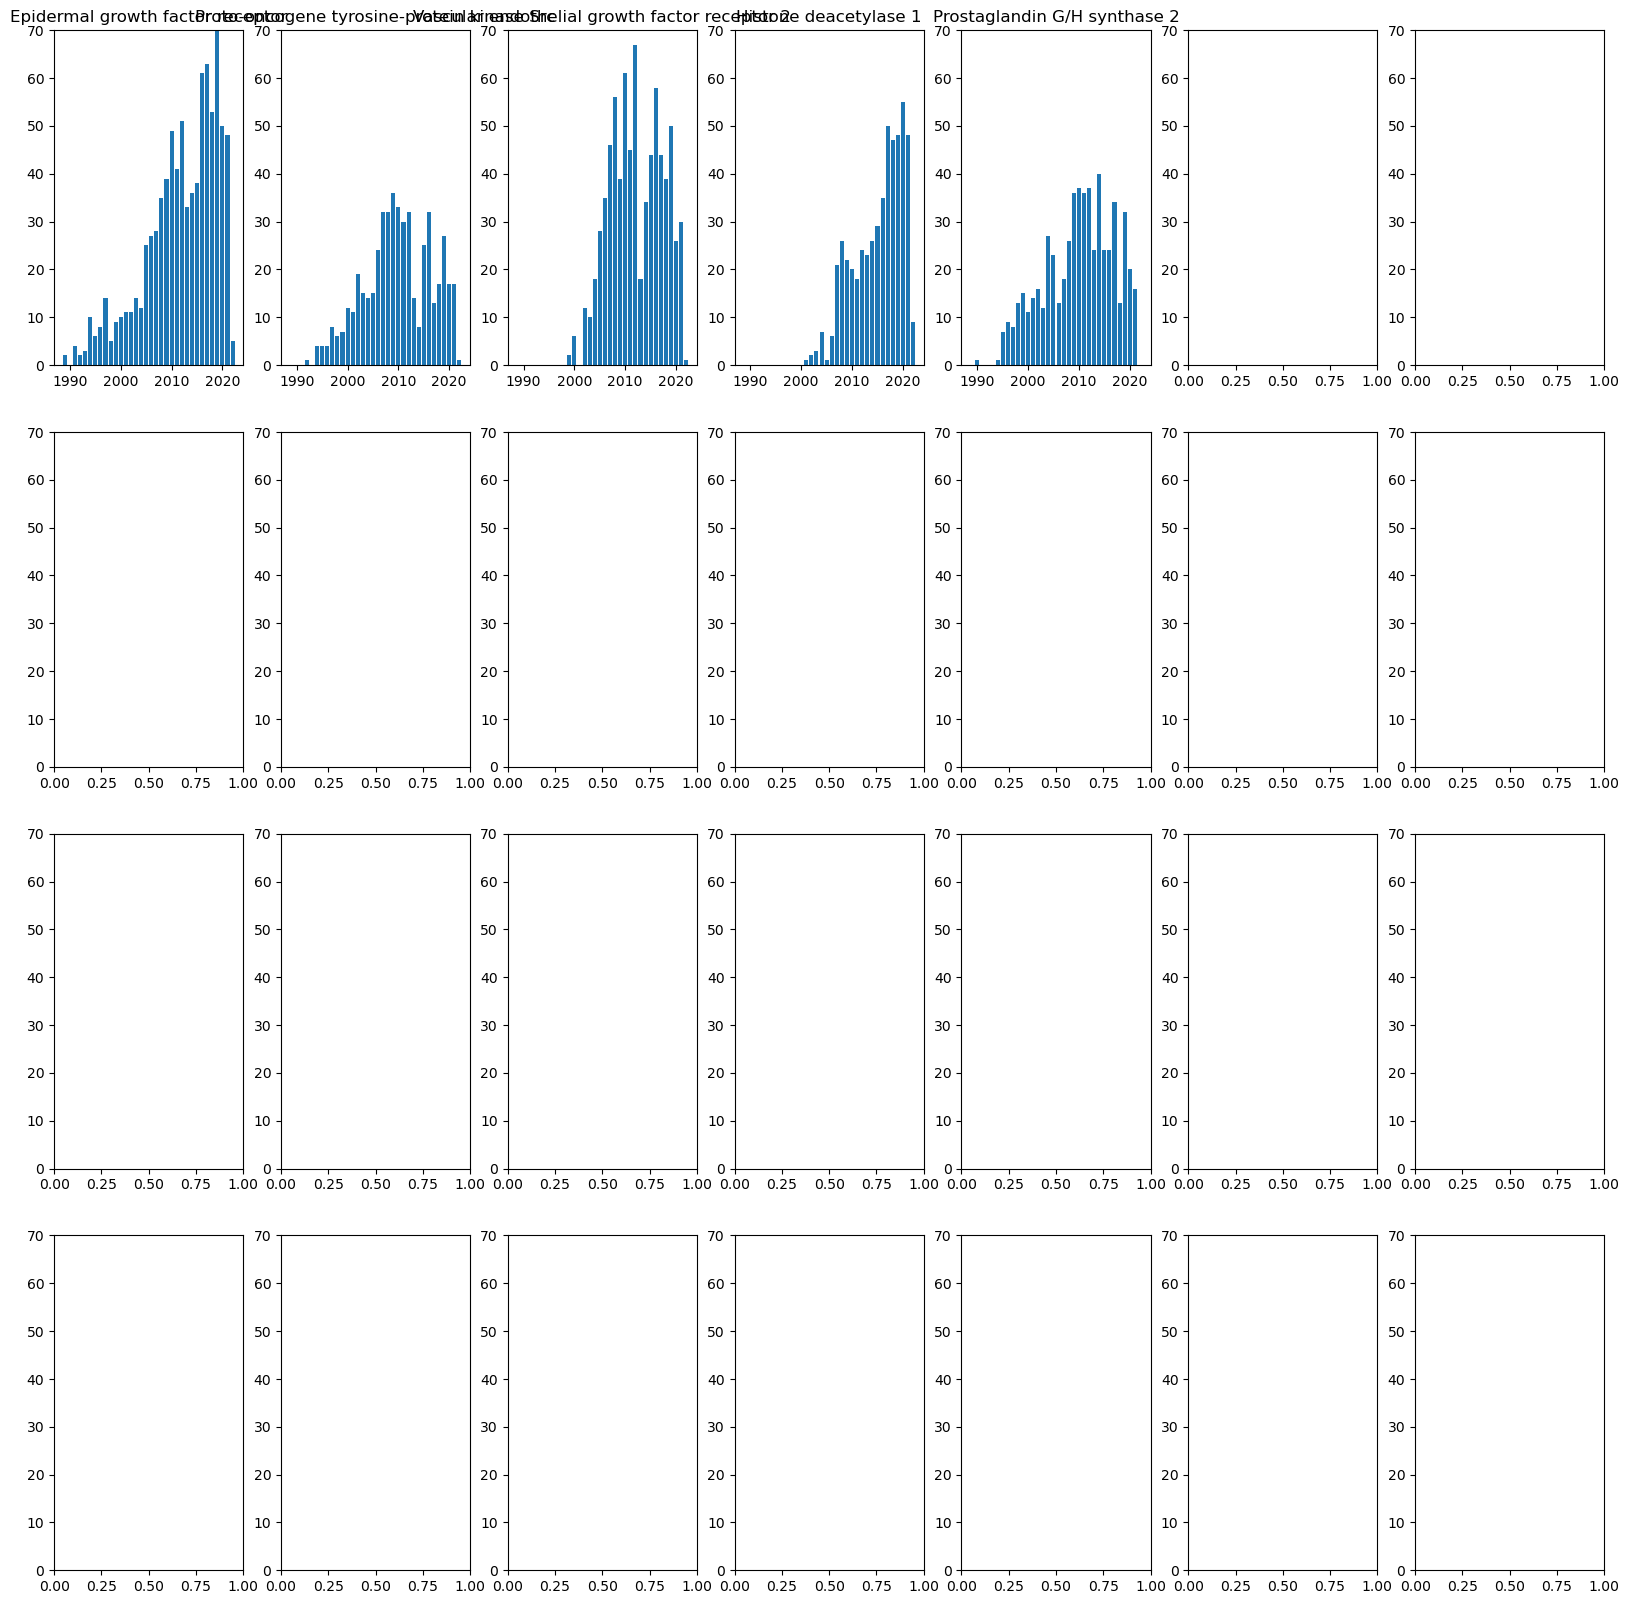

In [ ]:
# Crate subplots
fig, axs = plt.subplots(4, 7, figsize=(20, 20))

well_studied_proteins_all_dois = set().union(*well_studied_proteins.values())
df_doi_related = df_doi[df_doi.index.isin(well_studied_proteins_all_dois)]
min_year = df_doi_related['year'].min()
max_year = df_doi_related['year'].max()

years = np.arange(min_year, max_year+1)

max_y = 0
# Flatten the axs array
for (wsp, dois), ax in zip(well_studied_proteins.items(), axs.flatten()):
    print(f"{wsp} NA months: {(df_doi_related['year'].isna()).mean()*100:.2f}%")
    df_doi_related = df_doi[df_doi.index.isin(dois)]


    df_doi_related.dropna(subset=['year', ], inplace=True)

    counts_some = df_doi_related.value_counts('year')
    counts_all = [counts_some[y] if y in counts_some.index else 0 for y in years]
    ax.bar(years, counts_all, label=wsp)

    ax.set_title(wsp)
 
    max_y = max(max_y, max(counts_all))
for ax in axs.flatten():
    ax.set_ylim(0, max_y)

    

In [6]:
from openai import OpenAI
client = OpenAI()


print()

def is_cancer_realted(protein):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a pharmacological expert. You job is to review the following protein and answer the following quetion: Is research into binding affinity of this protein more likely to be cancer related, or not? Answer with 0 if it is not cancer related, and 1 if it is cancer related. Add no explanation, your answer should just be the digit."},
            {"role": "user", "content": protein}
            
        ]
    )
    return completion.choices[0].message.content


cancer_related_proteins = {
    "Cytochrome P450 3A4": False,
    "Epidermcancer_related_proteins = {al growth factor receptor": True,
    "Proto-oncogene tyrosine-protein kinase Src": True,
    "Vascular endothelial growth factor receptor 2": True,
    "D(2) dopamine receptor": False,
    "5-hydroxytryptamine receptor 1A": False,
    "5-hydroxytryptamine receptor 2A": False,
    "Acetylcholinesterase": False,
    "Cholinesterase": False,
    "Carbonic anhydrase 1": False,
    "Carbonic anhydrase 2": False,
    "Sodium-dependent serotonin transporter": False,
    "Prothrombin": False,
    "Adenosine receptor A2a": False,
    "Histone deacetylase 1": True,
    "Delta-type opioid receptor": False,
    "Mu-type opioid receptor": False,
    "Kappa-type opioid receptor": False,
    "Cytochrome P450 2C9": False,
    "Adenosine receptor A1": False,
    "Potassium voltage-gated channel subfamily H member 2": False,
    "Cannabinoid receptor 1": False,
    "Cytochrome P450 1A2": False,
    "Cytochrome P450 2C19": False,
    "Cytochrome P450 2D6": False,
    "Sodium-dependent dopamine transporter": False,
    "Prostaglandin G/H synthase 1": False,
    "Prostaglandin G/H synthase 2": True
}
for key in cancer_related_proteins.keys():
    print(f"{key}: {is_cancer_realted(key)}")


Cytochrome P450 3A4: 1
Epidermcancer_related_proteins = {al growth factor receptor: 1
Proto-oncogene tyrosine-protein kinase Src: 1
Vascular endothelial growth factor receptor 2: 1
D(2) dopamine receptor: 1
5-hydroxytryptamine receptor 1A: 1
5-hydroxytryptamine receptor 2A: 1
Acetylcholinesterase: 0
Cholinesterase: 0
Carbonic anhydrase 1: 1
Carbonic anhydrase 2: 1
Sodium-dependent serotonin transporter: 0
Prothrombin: 1
Adenosine receptor A2a: 1
Histone deacetylase 1: 1
Delta-type opioid receptor: 1
Mu-type opioid receptor: 0
Kappa-type opioid receptor: 1
Cytochrome P450 2C9: 1
Adenosine receptor A1: 1
Potassium voltage-gated channel subfamily H member 2: 1
Cannabinoid receptor 1: 1
Cytochrome P450 1A2: 1
Cytochrome P450 2C19: 1
Cytochrome P450 2D6: 0
Sodium-dependent dopamine transporter: 0
Prostaglandin G/H synthase 1: 1
Prostaglandin G/H synthase 2: 1


Epidermal growth factor receptor NA months: 0.30%
Proto-oncogene tyrosine-protein kinase Src NA months: 0.00%
Vascular endothelial growth factor receptor 2 NA months: 0.00%
Histone deacetylase 1 NA months: 0.00%
Prostaglandin G/H synthase 2 NA months: 0.00%


/tmp/ipykernel_281661/3316069151.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3316069151.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_281661/3316069151.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doi_related.dropna(subset=['year', ], inplace=True)
/tmp/ipykernel_2

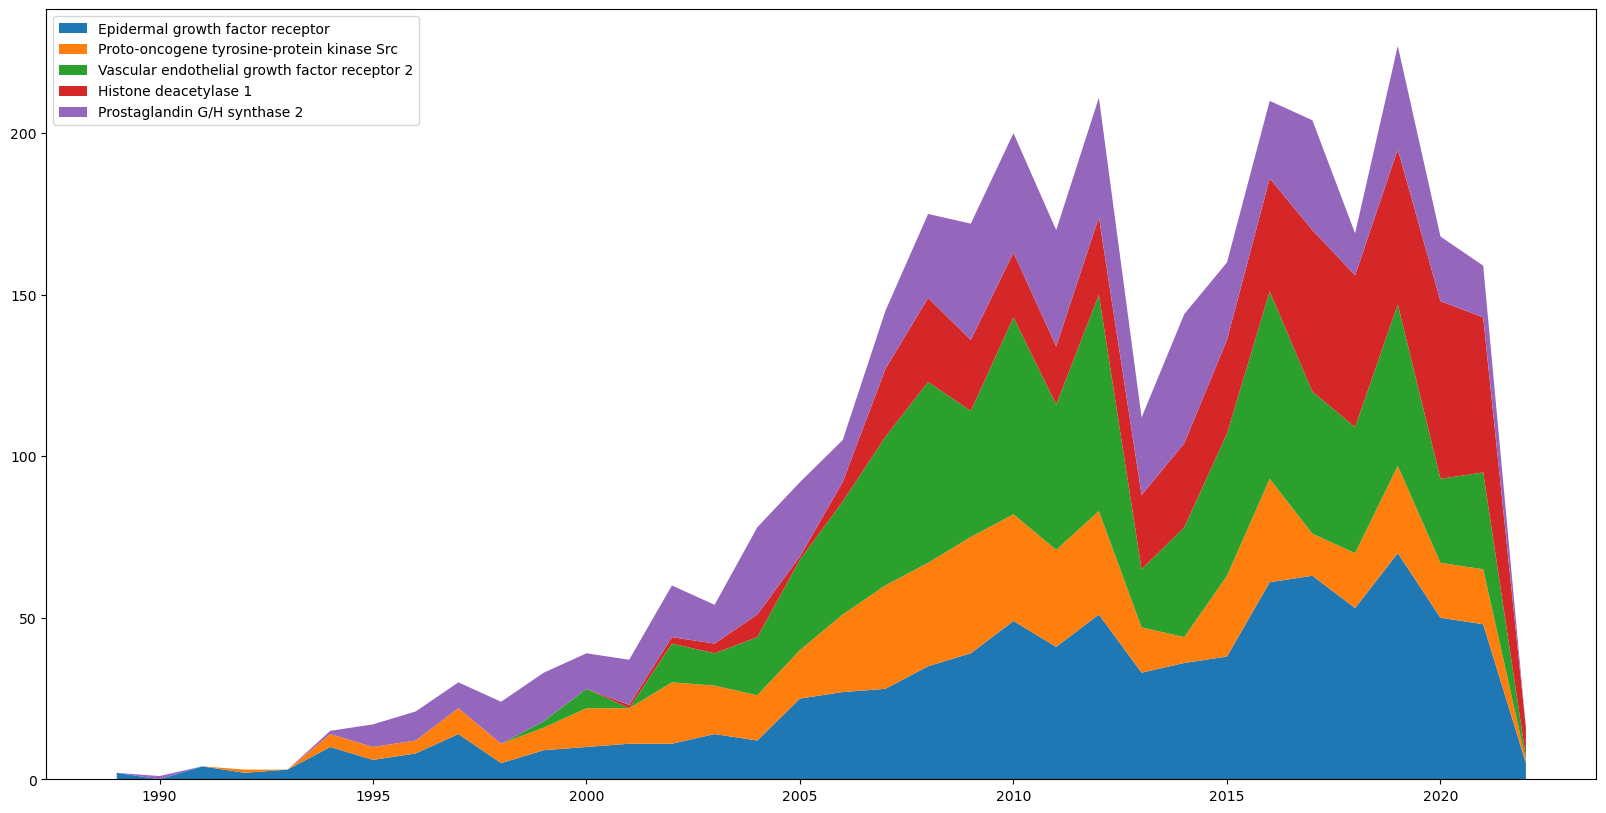

In [ ]:
# Crate subplots

well_studied_proteins_all_dois = set().union(*well_studied_proteins.values())
df_doi_related = df_doi[df_doi.index.isin(well_studied_proteins_all_dois)]
min_year = df_doi_related['year'].min()
max_year = df_doi_related['year'].max()

years = np.arange(min_year, max_year+1)
plt.figure(figsize=(20, 10))
max_y = 0
# Flatten the axs array
all_counts_array = []
for (wsp, dois), ax in zip(well_studied_proteins.items(), axs.flatten()):
    print(f"{wsp} NA months: {(df_doi_related['year'].isna()).mean()*100:.2f}%")
    df_doi_related = df_doi[df_doi.index.isin(dois)]


    df_doi_related.dropna(subset=['year', ], inplace=True)

    counts_some = df_doi_related.value_counts('year')
    counts_all = [counts_some[y] if y in counts_some.index else 0 for y in years]
    all_counts_array.append(counts_all)

    ax.bar(years, counts_all, label=wsp)

    ax.set_title(wsp)

    max_y = max(max_y, max(counts_all))
for ax in axs.flatten():
    ax.set_ylim(0, max_y)



plt.stackplot(years, all_counts_array, labels=well_studied_proteins.keys())
plt.legend()
    

This dose not consider the number of Ligands in a single article (the number of measurements).

# Perhpas we can manually check if these proteins are cancer related or not!

In [ ]:
df_doi.head()

In [ ]:

df_doi.dropna(subset=['year']).value_counts('year').sort_index().plot(kind='bar') 